In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
orderDetails= pd.read_csv(r"C:\Users\Amin\Downloads\Order_details(masked).csv")
orderDetails.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [6]:
orderDetails['Time']=pd.to_datetime(orderDetails["Transaction Date"])
orderDetails['Hour']=(orderDetails['Time']).dt.hour

In [7]:
timemost1= orderDetails['Hour'].value_counts().index.tolist()[:24]
timemost2= orderDetails['Hour'].value_counts().values.tolist()[:24]

In [8]:
tmost=np.column_stack((timemost1, timemost2))
print("hour of day" + "\t" + "cumulative number of purchases\n")
print("\n".join("\t\t".join(map(str, row)) for row in tmost))

hour of day	cumulative number of purchases

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [11]:
timemost_series= orderDetails["Hour"].value_counts()

timemost_sorted=timemost_series.reindex(range(0,24), fill_value=0)

timemost_list=timemost_sorted.tolist()
timemost_df=pd.DataFrame({'hour': timemost_sorted.index, 'orderCount': timemost_sorted.values})


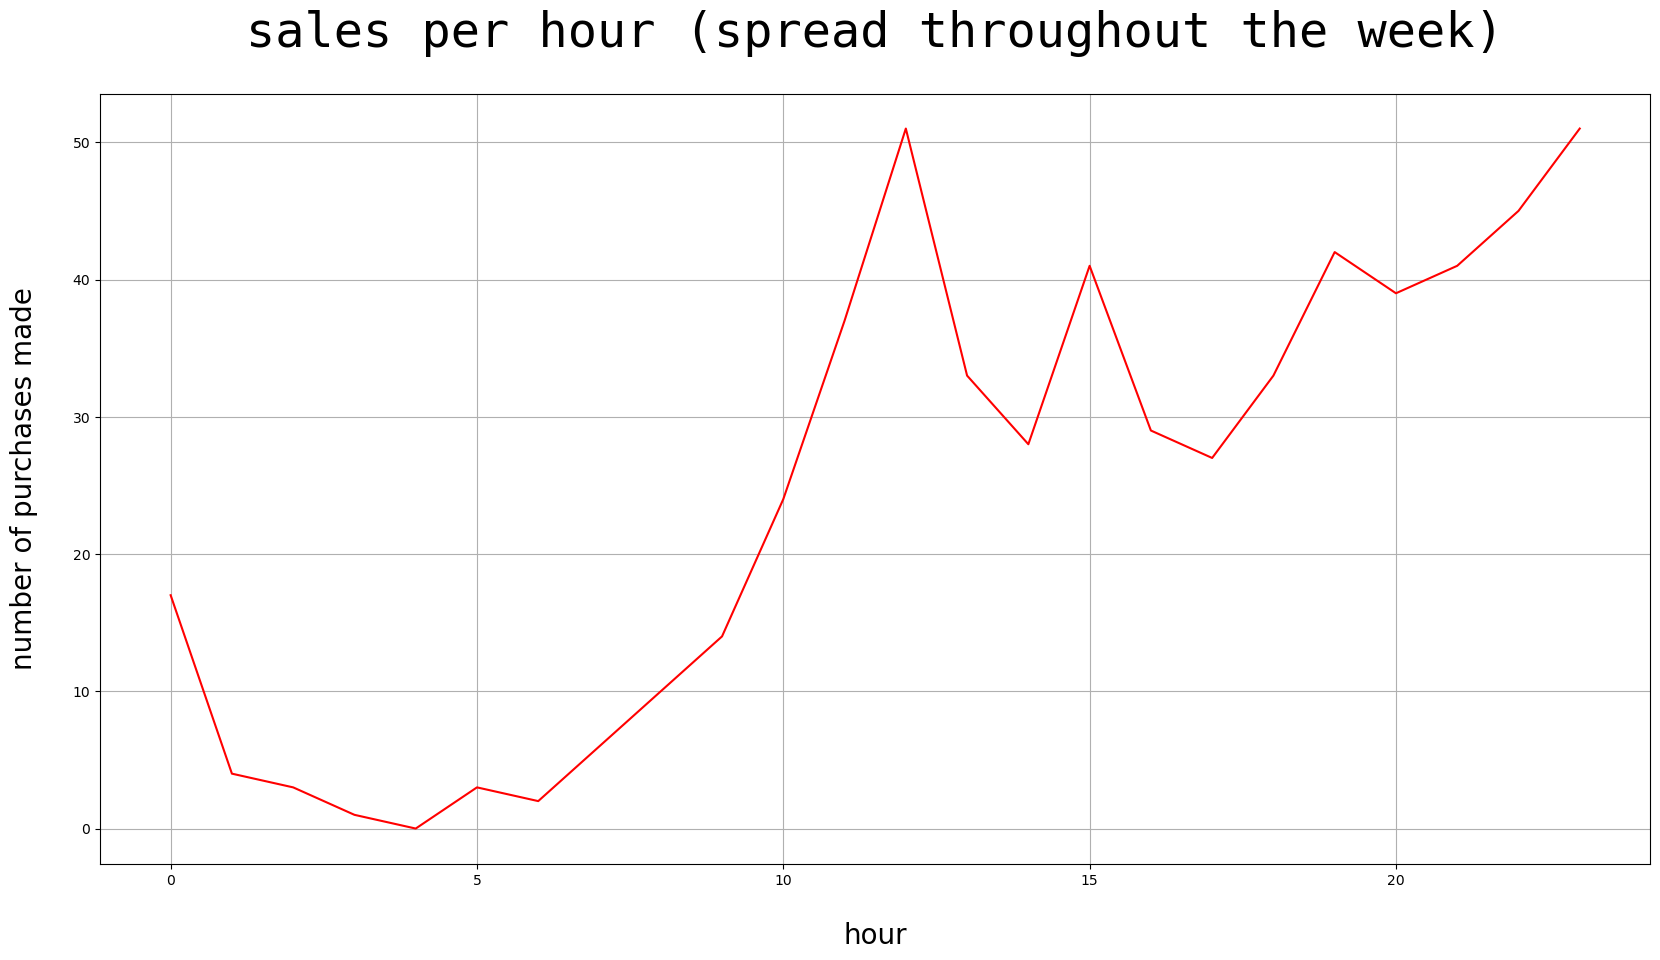

In [15]:
plt.figure(figsize=(20,10))
plt.title('sales per hour (spread throughout the week)',
          fontdict={'fontname': 'monospace', 'fontsize':35},
          y=1.05)
plt.ylabel("number of purchases made", fontsize=20, labelpad=25)
plt.xlabel("hour", fontsize=20, labelpad=25)
plt.plot(timemost_sorted.index, timemost_sorted.values, color='r')
plt.grid()
plt.show()